In [ ]:
I am analyzing psuedo facebook data which has been modified for security reasons.This data has 99003 records 
    and 15 attributes. The attributes are as follows: "userid","age","dob_day", "dob_year", "dob_month", "gender", tenure",
"friend_count", "friendships_initiated", "likes", "likes_received", "mobile_likes", "mobile_likes_received", "www_likes", 
"www_likes_received"

In [ ]:
###Import Data

In [4]:
fd = read.csv('pseudo_facebook.tsv',sep ='\t')

In [ ]:
##Histogram of Birthday

In [ ]:
31st of of every month has low count which makes sense as not every month has 31 days 1st day of month had a huge peak which 
seemed weird.

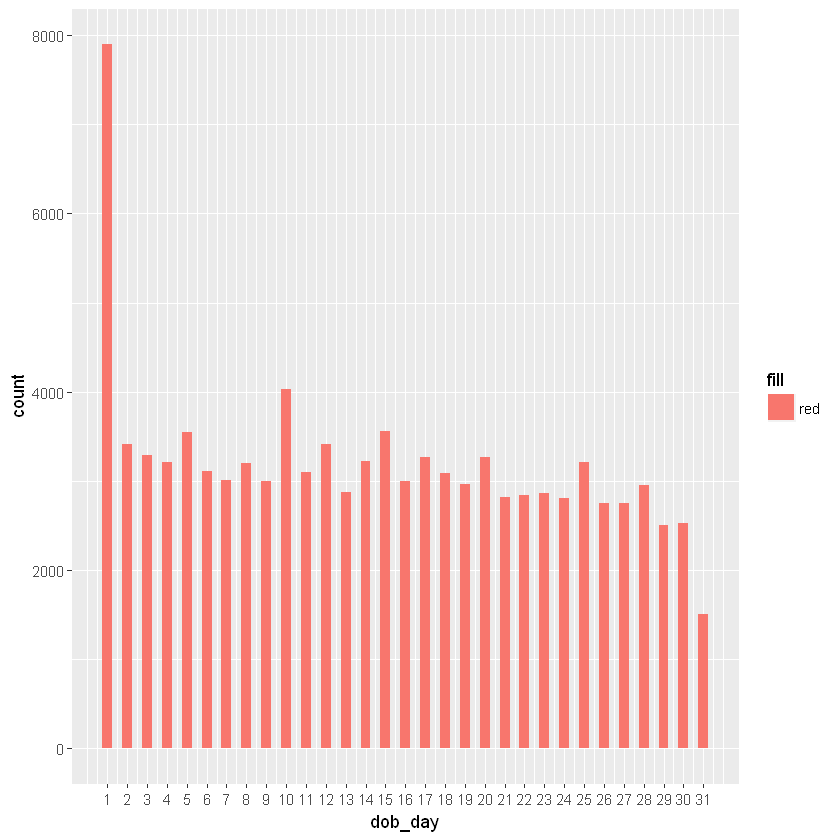

In [8]:
library(ggplot2)
qplot(x= dob_day, data = fd, binwidth = .5, fill = 'red') + scale_x_continuous(breaks = 1:31)

In [ ]:
Later I tried to dive in further to get more insights. I saw that most of the peak is for 1st January which could be a 
default setting for the users who did not add their birthdays.

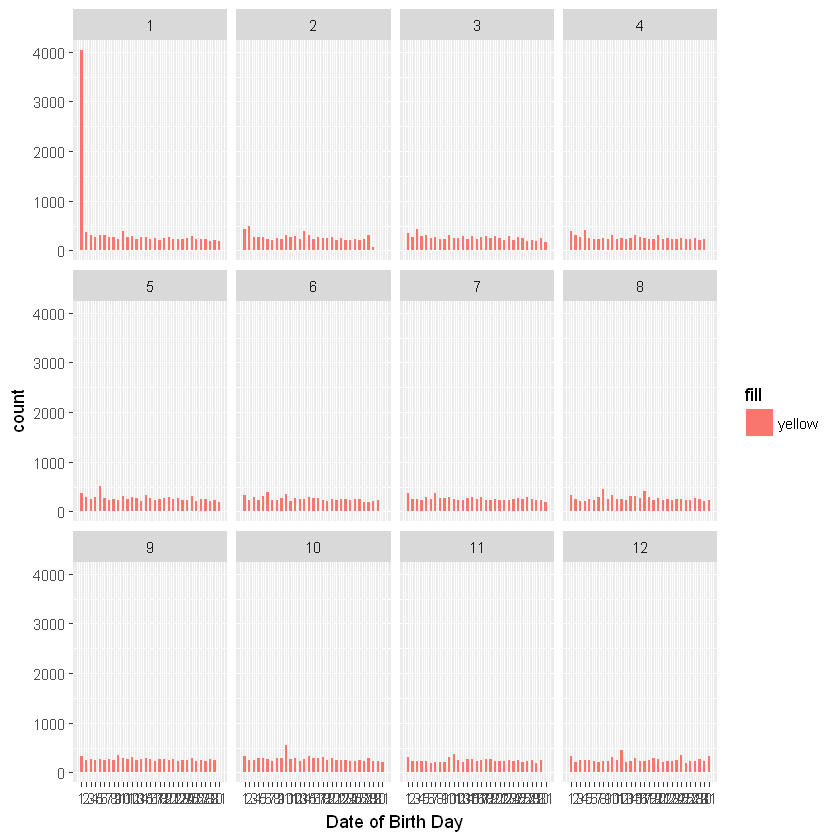

In [13]:
qplot(x= dob_day, data = fd, binwidth = .5,fill = 'red') + 
  scale_x_continuous(breaks = 1:31) +
  facet_wrap(~dob_month)+xlab('Date of Birth Day')

In [ ]:
##Histogram of Friendcount

In [ ]:
Its a right skewed data with most entries in the range of 0 to 1000

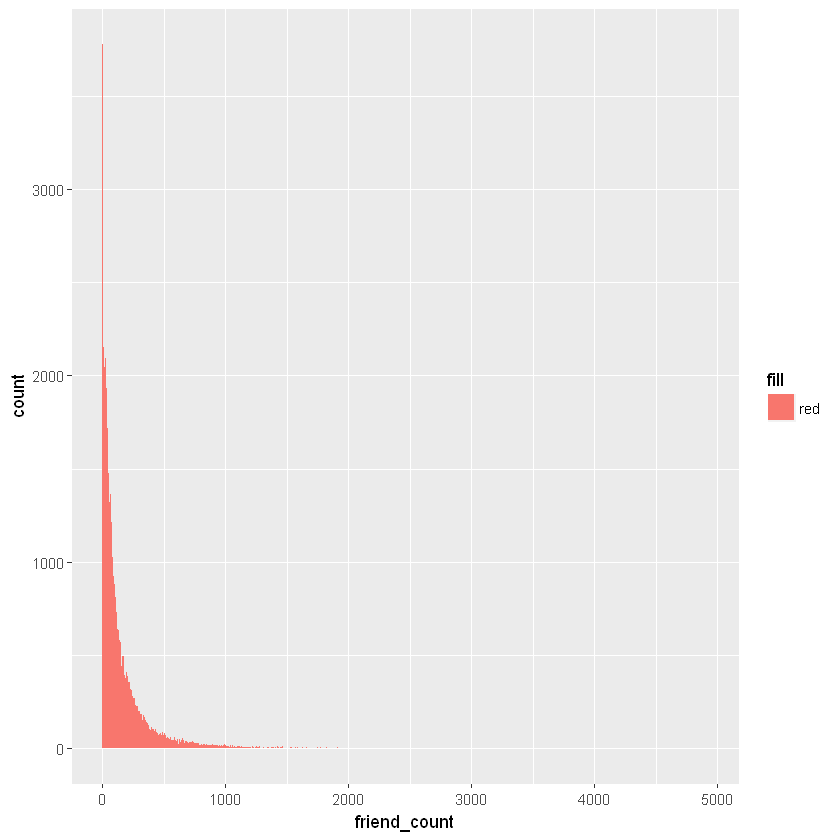

In [14]:
qplot(x= friend_count, data = fd, binwidth = 3,fill = 'red')

In [ ]:
Setting a limit on axis

Warning message:
"Removed 2951 rows containing non-finite values (stat_bin)."

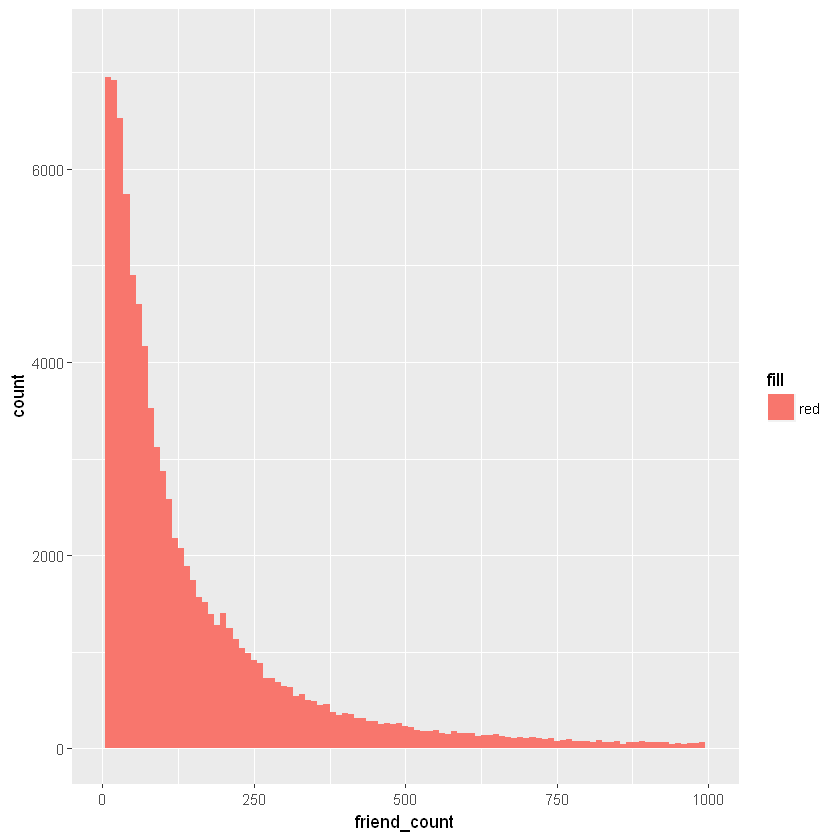

In [16]:
qplot(x= friend_count, data = fd, binwidth = 10,fill = 'red') + 
  scale_x_continuous(limits = c(0,1000))

In [ ]:
##Analyzing friend count by gender 

Warning message:
"Removed 2949 rows containing non-finite values (stat_bin)."

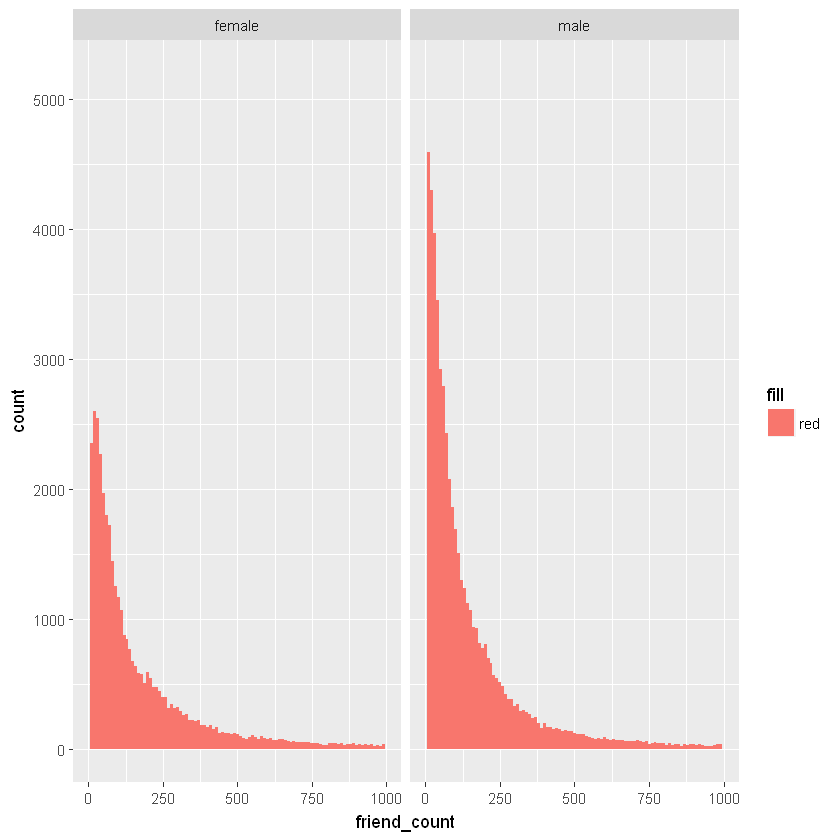

In [18]:
qplot(x= friend_count, data = na.omit(fd), binwidth = 10,fill = 'red') + 
  scale_x_continuous(limits = c(0,1000)) +
  facet_wrap(~gender) 

In [ ]:
##Statistics by Gender Solution

In [19]:
by(fd$friend_count, fd$gender, summary)

fd$gender: female
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0      37      96     242     244    4923 
------------------------------------------------------------ 
fd$gender: male
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0      27      74     165     182    4917 

In [ ]:
##Log transformation works better on skewed data

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


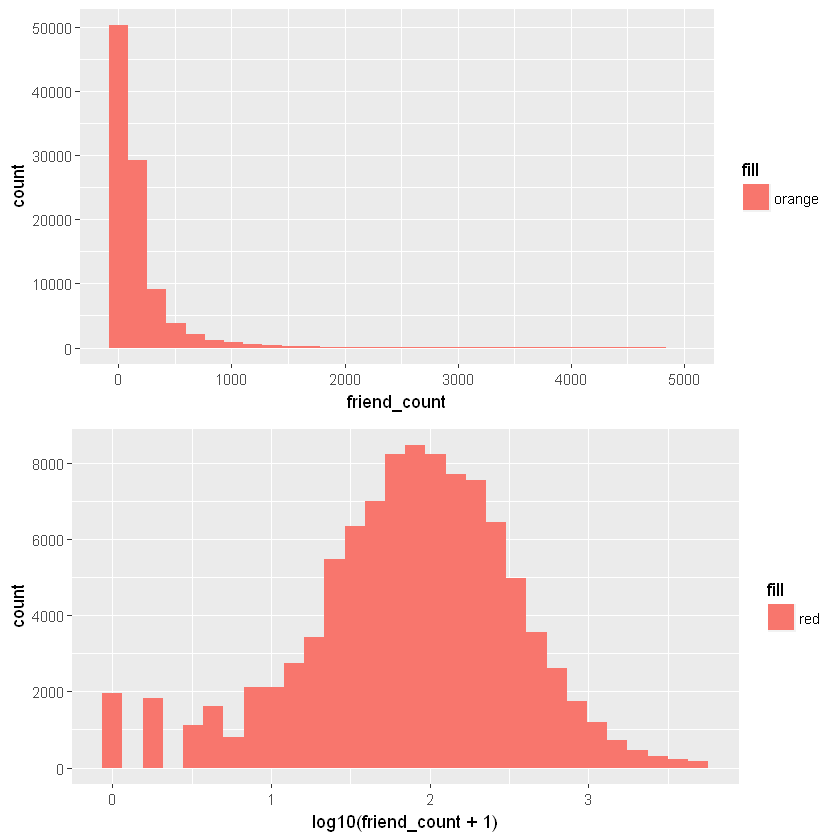

In [30]:
p = qplot(x= friend_count, data = fd, fill = 'red')
p1 = qplot(x= log10(friend_count + 1), data = fd, fill = 'red')
library(gridExtra)
grid.arrange(p,p1, ncol = 1)

In [ ]:
##Frequency Polygon to comapare counts histograms by gender

Warning message:
"Removed 2949 rows containing non-finite values (stat_bin)."Warning message:
"Removed 4 rows containing missing values (geom_path)."

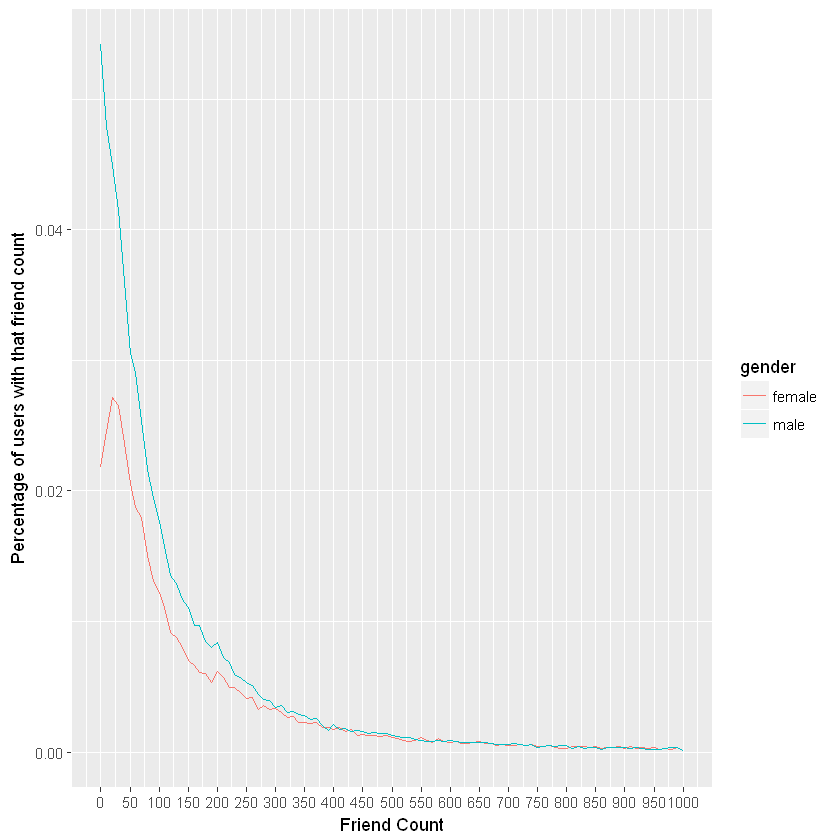

In [23]:
ggplot(aes(x = friend_count, y = ..count../sum(..count..)), data = subset(fd, !is.na(gender))) + 
  geom_freqpoly(aes(color = gender), binwidth=10) + 
  scale_x_continuous(limits = c(0, 1000), breaks = seq(0, 1000, 50)) + 
  xlab('Friend Count') + 
  ylab('Percentage of users with that friend count')

In [ ]:
##Analyzing likes by gender

Warning message:
"Transformation introduced infinite values in continuous x-axis"`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 60935 rows containing non-finite values (stat_bin)."

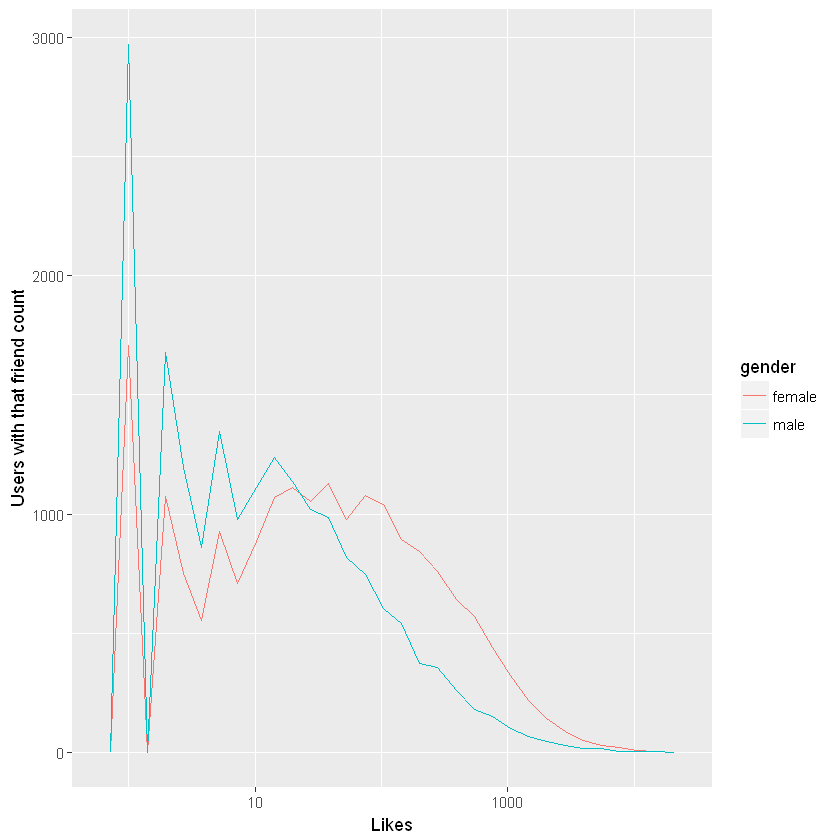

In [25]:
ggplot(aes(x = www_likes), data = subset(fd, !is.na(gender))) + 
  geom_freqpoly(aes(color = gender)) + 
  scale_x_log10()+
  xlab('Likes') + 
  ylab('Users with that friend count')

In [ ]:
##Analysis to see who initiates a friend request on an average

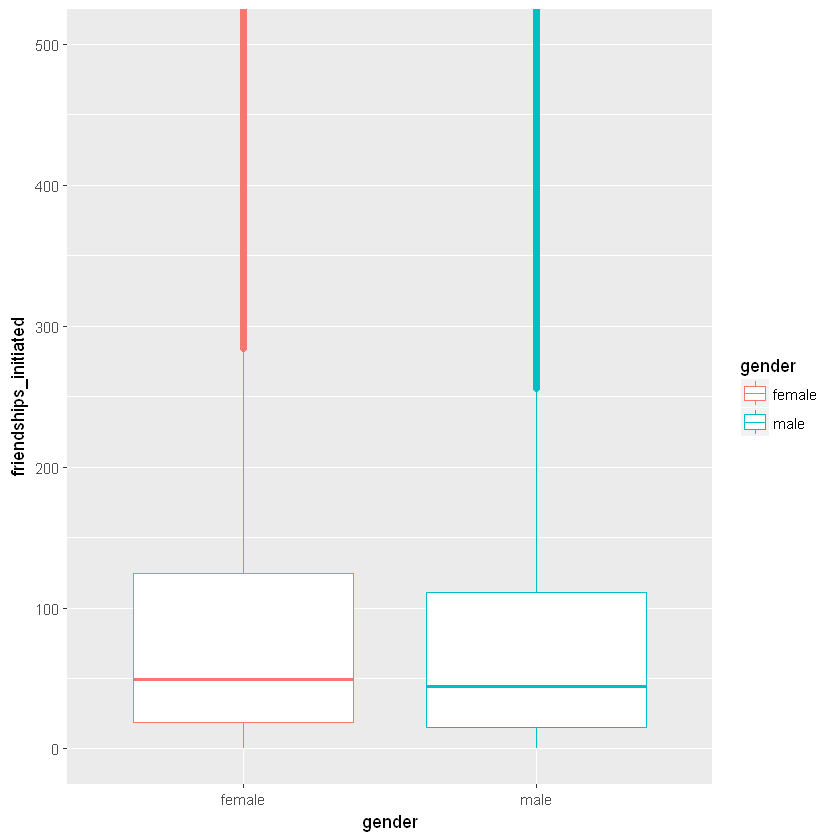

In [26]:
qplot(x = gender, y = friendships_initiated, data = subset(fd, !is.na(gender)),geom = 'boxplot', color = gender)+
  coord_cartesian(ylim = c(0,500))
  

In [ ]:
checking if facebook should concerntrate on their mobile app For this we can check what percent of people actually use
facebook on their mobile This can be found out using mobile_like attribute in the dataset.

In [28]:
fd$mobile_chekin = ifelse(fd$mobile_likes>0,1,0)
table(fd$mobile_chekin)


    0     1 
35056 63947 

In [ ]:
This tells that more than 50 percent people use facebook on mobile

In [ ]:
##Analyzing Friend counts conditional on age

Warning message:
"Removed 4575 rows containing missing values (geom_point)."

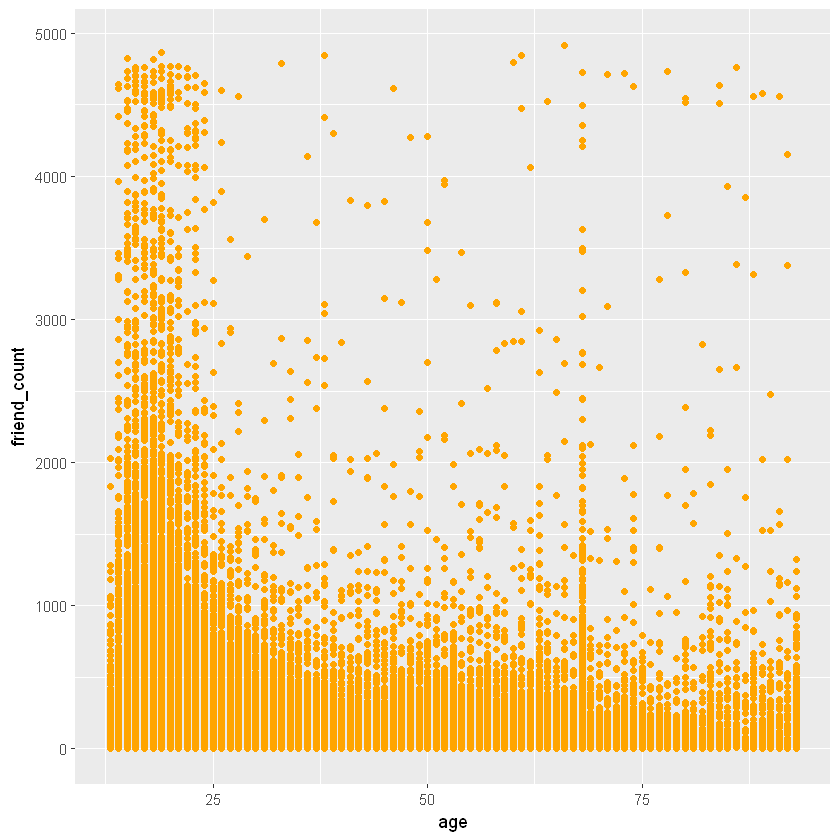

In [38]:
ggplot(aes(x = age, y = friend_count), data = fd) +geom_point(color = 'orange') +
  xlim(13,93) 

In [ ]:
As there are too many points let us understand the density of the points in the graph. Let us reduce the effect of overplotting

Warning message:
"Removed 4926 rows containing missing values (geom_point)."

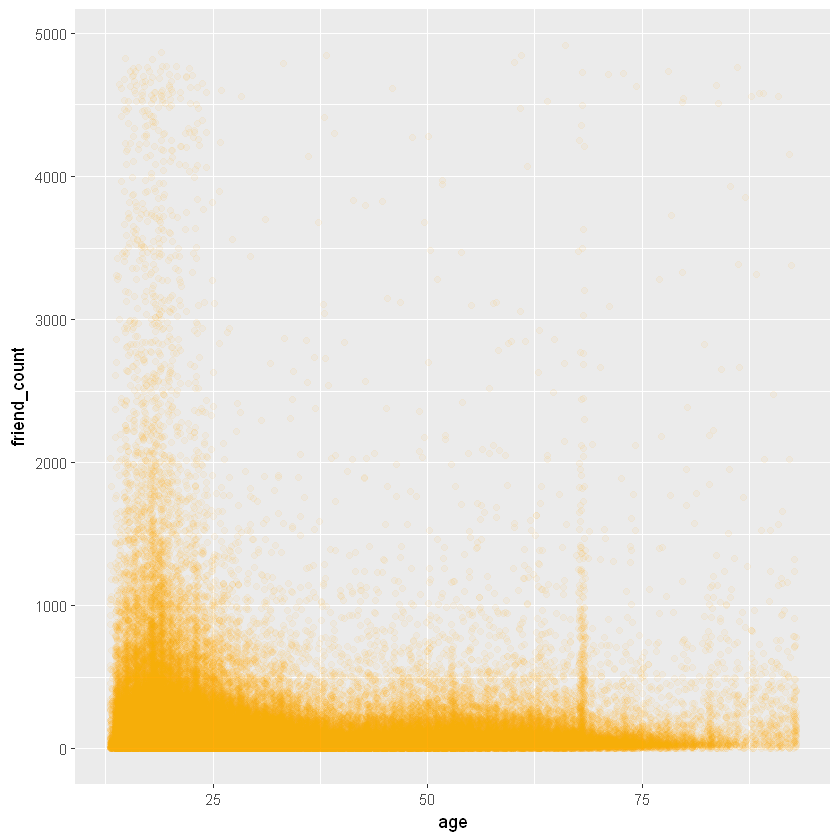

In [34]:
ggplot(aes(x = age, y = friend_count), data = fd) +geom_jitter(alpha = 1/20,color = 'orange')+
  xlim(13,93)

In [ ]:
It seems that data points are mostly concerntrated in friend_count range of (0,1000) and age range of (0,75)

In [ ]:
Now let us have a look at the quantile distribution of the data Let us reduce the effect of overplotting

Warning message:
"Removed 4575 rows containing non-finite values (stat_summary)."Warning message:
"Removed 4575 rows containing non-finite values (stat_summary)."Warning message:
"Removed 4575 rows containing non-finite values (stat_summary)."Warning message:
"Removed 4909 rows containing missing values (geom_point)."

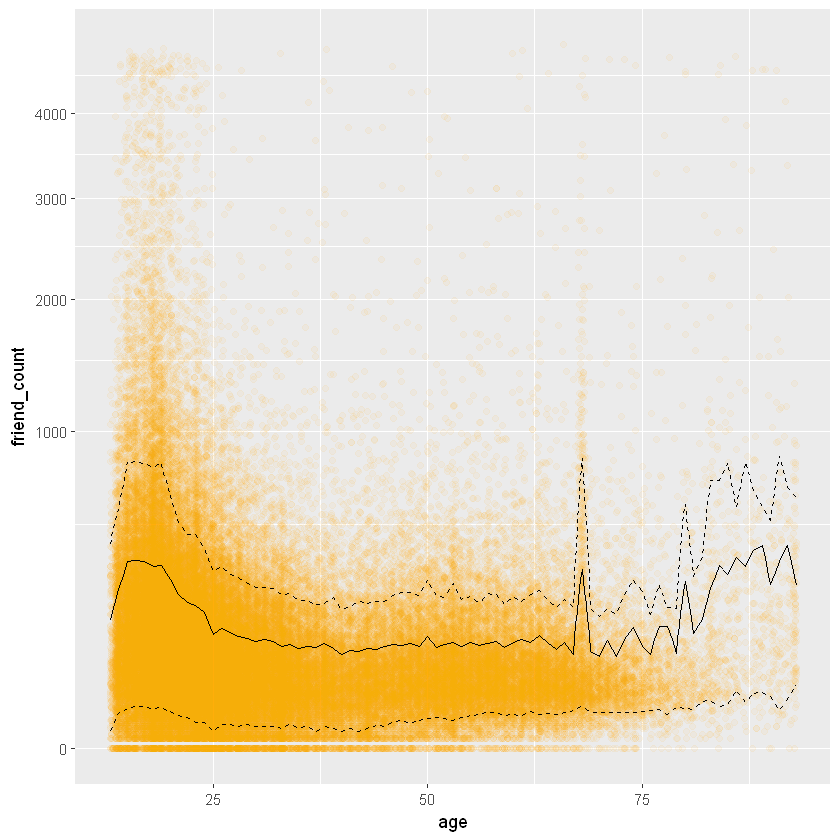

In [36]:
ggplot(aes(x = age, y = friend_count), data = fd) + xlim(13,93) + 
geom_point(alpha = 1/20,color = 'orange', position = position_jitter(h = 0)) +
   coord_trans(y = 'sqrt') +
  geom_line(stat = 'summary', fun.y = mean) +
  geom_line(stat= 'summary', fun.y = quantile, fun.args = list(probs = .9), linetype = 2) +
  geom_line(stat= 'summary', fun.y = quantile, fun.args = list(probs = .1), linetype = 2)